In [10]:
from ocik.structure.doPC import doPC
from pgmpy.estimators import PC, HillClimbSearch, ExhaustiveSearch, K2Score
from graphviz import Digraph, Graph
from ocik.example import Asia, Room, Circuit
import networkx as nx

In [4]:
def draw(edge, directed=True):
    dot = Digraph(graph_attr={'rankdir':'LR'}) if directed else Graph()
    dot.edges(edge)
    return dot

def difference(gt, pred):
    f = Digraph(graph_attr={'rankdir':'LR'})
    new_edges = [ed for ed in pred if ed not in gt]
    f.attr('edge', color='blue')
    f.edges(new_edges)

    missed_edges = [ed for ed in gt if ed not in pred]
    f.attr('edge', color='red')
    f.edges(missed_edges)

    recovered_edges = [ed for ed in pred if ed in gt]
    f.attr('edge', color='green')
    f.edges(recovered_edges)
    return f

In [5]:
asia = Asia()
df = asia.load_data(10)

In [6]:
orientation = set()
estimator = doPC(data=df)
model = estimator.estimate(max_cond_vars=4,
                           env=asia.bn,
                           orientation=orientation)

Working for n conditional variables: 3:  75%|███████▌  | 3/4 [00:29<00:09,  9.88s/it]


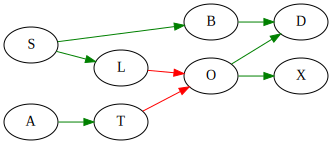

In [7]:
difference(asia.bn.G.edges(), list(orientation))

In [19]:
room = Room()
df = room.bn.sample(10)


100%|██████████| 10/10 [00:00<00:00, 237.87it/s]


In [20]:
orientation = set()
estimator = doPC(data=df)
model = estimator.estimate(max_cond_vars=4,
                           env=room.bn,
                           orientation=orientation)


Working for n conditional variables: 3:  75%|███████▌  | 3/4 [00:14<00:04,  4.74s/it]


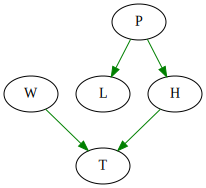

In [21]:
difference(room.bn.G.edges(), list(orientation))

In [13]:
circuit = Circuit()
bn = circuit.bn

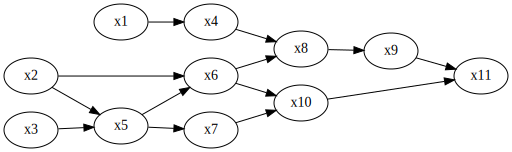

In [21]:
draw(bn())

In [14]:
orientation = set()
df=bn.sample(2)
estimator = doPC(data=df)
model = estimator.estimate(max_cond_vars=4,
                           env=bn,
                           orientation=orientation)

Working for n conditional variables: 4: 100%|██████████| 4/4 [05:41<00:00, 62.58s/it]/Users/kanva/workspace/telecom/projet_IA/causality_detection/ocik/structure/doPC.py:116: UserWarning: Reached maximum number of allowed conditional variables. Exiting
  warn("Reached maximum number of allowed conditional variables. Exiting")
Working for n conditional variables: 4: 100%|██████████| 4/4 [05:41<00:00, 85.29s/it]


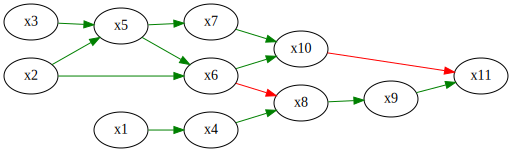

In [15]:
difference(bn.G.edges(), list(orientation))

In [16]:
df=bn.sample(100000)

100%|██████████| 100000/100000 [07:23<00:00, 225.36it/s]


In [17]:
df.to_csv('circuit.csv', index=False)

Working for n conditional variables: 4: 100%|██████████| 4/4 [00:03<00:00,  1.53it/s]/Users/kanva/anaconda3/envs/projetia/lib/python3.8/site-packages/pgmpy/estimators/PC.py:366: UserWarning: Reached maximum number of allowed conditional variables. Exiting
  warn("Reached maximum number of allowed conditional variables. Exiting")
Working for n conditional variables: 4: 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]
/Users/kanva/anaconda3/envs/projetia/lib/python3.8/site-packages/pgmpy/base/DAG.py:885: UserWarning: PDAG has no faithful extension (= no oriented DAG with the same v-structures as PDAG). Remaining undirected PDAG edges oriented arbitrarily.
  warn(


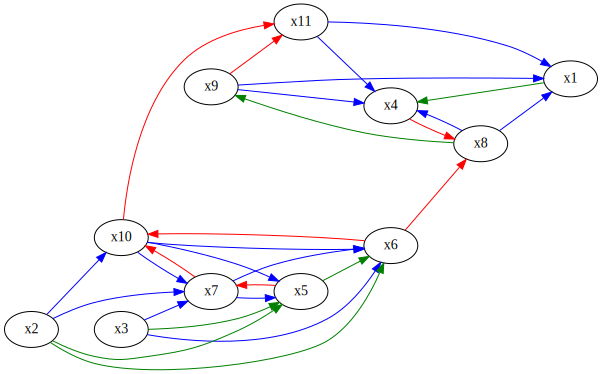

In [20]:
est = PC(data=df)
estimated_model = est.estimate(variant='stable', max_cond_vars=4)
difference(bn.G.edges(), estimated_model.edges())

  0%|          | 12/10000 [00:02<41:31,  4.01it/s] 


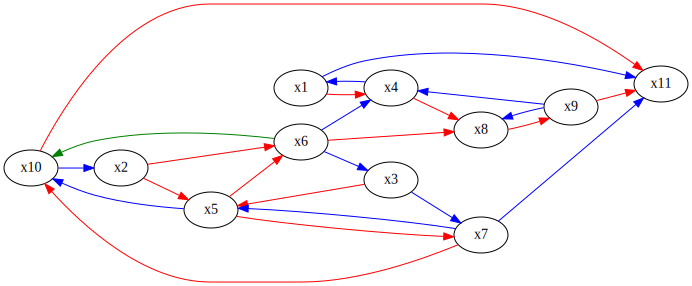

In [19]:
scoring_method = K2Score(data=df)
est = HillClimbSearch(data=df)
estimated_model = est.estimate(scoring_method=scoring_method, max_indegree=4, max_iter=int(1e4))
difference(bn.G.edges(), estimated_model.edges())

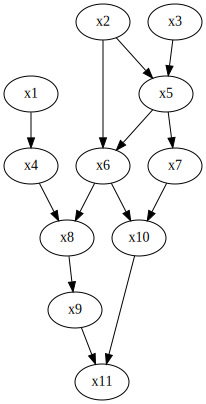

In [6]:
circuit = Circuit()
draw(circuit.bn())

In [ ]:
orientation = set()

estimator = doPC(data=dfx)
model = estimator.estimate(max_cond_vars=4,
                           env=bn,
                           orientation=orientation)

In [31]:
graph = nx.complete_graph(n=Room().bn.G.nodes(), create_using=nx.Graph)
G = nx.DiGraph(list(graph.edges()))
DiG = nx.DiGraph(list(G.edges()) + list(G.reverse().edges()))
DiG.remove_edge('P','W')

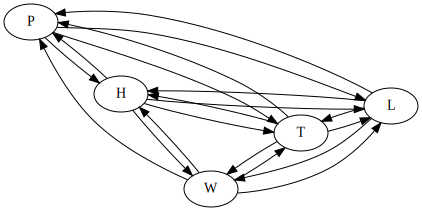

In [32]:
draw(DiG.edges())

In [34]:
list(DiG.neighbors('P'))

['H', 'L', 'T']